In [1]:
!pip install pymysql

                                              0.0/44.8 kB ? eta -:--:--
     ---------------------------------------- 44.8/44.8 kB 1.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import math
import pymysql
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_column', None)

In [4]:
dbcon = pymysql.connect(host="localhost",user= "root",password= "root",database= "db1")

In [5]:
dbcon

#Example for loading the data from My SQL

In [6]:
pd.read_sql_query("""select * from breast_cancer_data where diagnosis=0""", dbcon)

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
207        20.92         25.09          143.00     1347.0          0.10990   
208        21.56         22.39          142.00     1479.0          0.11100   
209        20.13         28.25          131.20     1261.0          0.09780   
210        16.60         28.08          108.30      858.1          0.08455   
211        20.60         29.33          140.10     1265.0          0.11780   

     diagnosis  
0            0  
1            0  
2            0  
3            0  
4            0  
..         ...  
207          0  
208          0  
209          0  
210          0  
211          0  

[212 rows x 6 columns]

In [7]:
diagnose='1'

In [8]:
pd.read_sql_query("""select * from breast_cancer_data where diagnosis= '"""+diagnose+"""' """, dbcon)

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0         13.540         14.36           87.46      566.3          0.09779   
1         13.080         15.71           85.63      520.0          0.10750   
2          9.504         12.44           60.34      273.9          0.10240   
3         13.030         18.42           82.61      523.8          0.08983   
4          8.196         16.84           51.71      201.9          0.08600   
..           ...           ...             ...        ...              ...   
352       14.590         22.68           96.39      657.1          0.08473   
353       11.510         23.93           74.52      403.5          0.09261   
354       14.050         27.15           91.38      600.4          0.09929   
355       11.200         29.37           70.67      386.0          0.07449   
356        7.760         24.54           47.92      181.0          0.05263   

     diagnosis  
0            1  
1            1  
2            1  
3            1  
4            1  
..         ...  
352          1  
353          1  
354          1  
355          1  
356          1  

[357 rows x 6 columns]

In [8]:
pd.read_sql_query("""select * from breast_cancer_data where diagnosis= '"""+diagnose+"""' and mean_texture >20 """, dbcon, parse_dates= True)

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        13.490         22.30           86.91      561.0          0.08752   
1        11.760         21.60           74.72      427.9          0.08637   
2         8.598         20.98           54.66      221.8          0.12430   
3         9.465         21.01           60.11      269.4          0.10440   
4        11.450         20.97           73.81      401.5          0.11020   
..          ...           ...             ...        ...              ...   
78       14.590         22.68           96.39      657.1          0.08473   
79       11.510         23.93           74.52      403.5          0.09261   
80       14.050         27.15           91.38      600.4          0.09929   
81       11.200         29.37           70.67      386.0          0.07449   
82        7.760         24.54           47.92      181.0          0.05263   

    diagnosis  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
78          1  
79          1  
80          1  
81          1  
82          1  

[83 rows x 6 columns]

# Loading the data for EDA and Model training

In [9]:
df= pd.read_sql_query("""select * from breast_cancer_data""", dbcon, parse_dates= True)

In [10]:
df.head(5)

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [12]:
df.describe()

mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness   diagnosis  
count       569.000000  569.000000  
mean          0.096360    0.627417  
std           0.014064    0.483918  
min           0.052630    0.000000  
25%           0.086370    0.000000  
50%           0.095870    1.000000  
75%           0.105300    1.000000  
max           0.163400    1.000000

In [13]:
df.shape

(569, 6)

In [14]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

#eda

<Axes: xlabel='diagnosis', ylabel='count'>

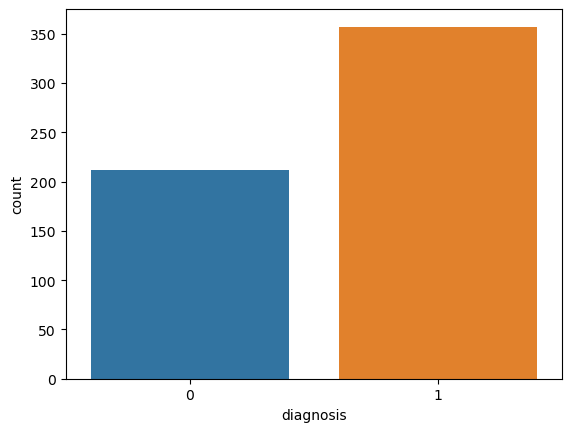

In [15]:
sns.countplot(x="diagnosis", data=df)

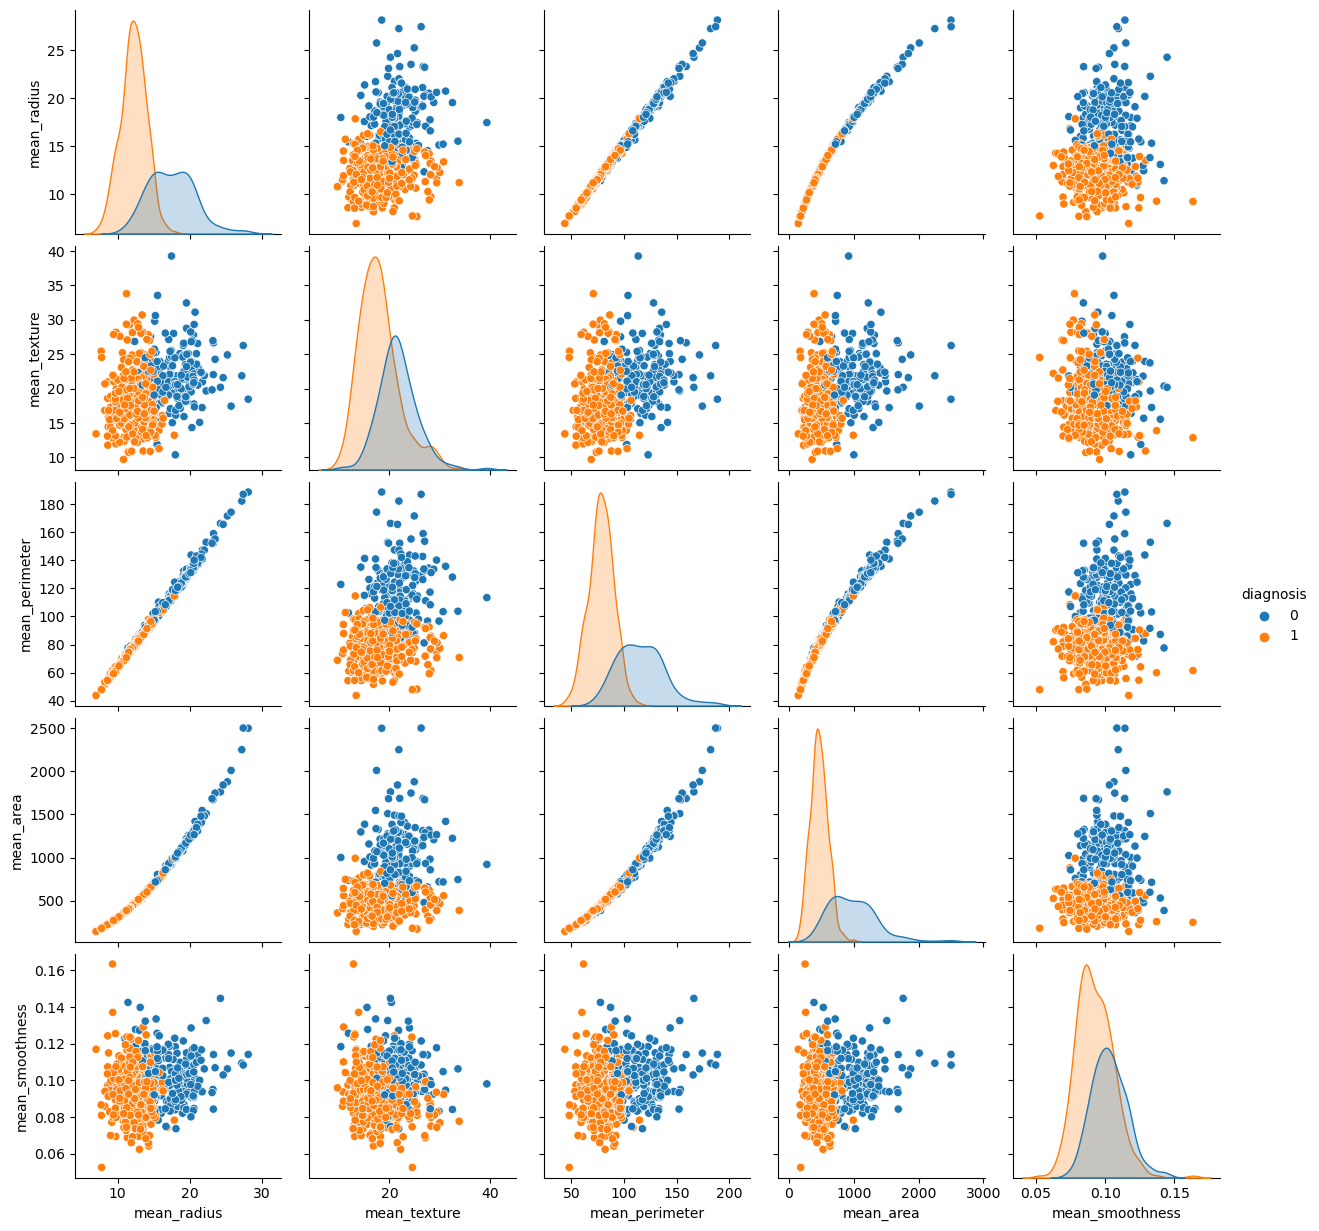

In [16]:
sns.pairplot(df, hue="diagnosis")

In [17]:
labels = df['diagnosis']
values = df['mean_area']
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [18]:
labels = df['diagnosis']
values = df['mean_perimeter']
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [19]:
labels = df['diagnosis']
values = df['mean_texture']
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

<Axes: xlabel='mean_area', ylabel='Density'>

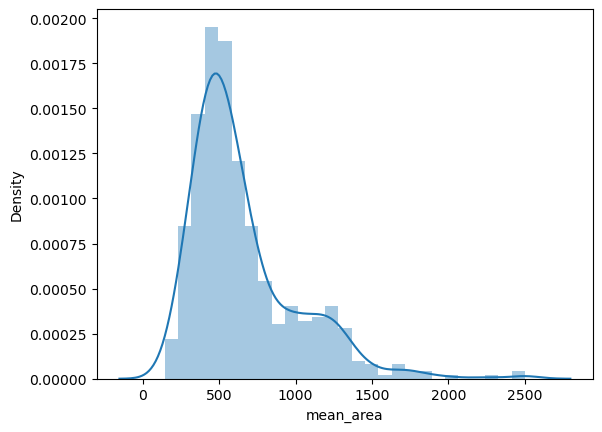

In [20]:
sns.distplot( df["mean_area"] )

# model training

In [21]:
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [24]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
# predictions
rfc_predict = rfc.predict(x_test)

print("Accuracy:",accuracy_score(y_test, rfc_predict))

Accuracy: 0.9210526315789473


# Reading multiple tables

In [25]:
dbcon = pymysql.connect(host="localhost",user= "root",password= "root",database= "project")

In [26]:
df1 = pd.read_sql_query("""select * from `financial dataset` """, dbcon, parse_dates= True)

In [27]:
df1.head(5)

uniqueid country Has a Bank account Type of Location Cell Phone Access  \
0  uniqueid_1   Kenya                Yes            Urban               Yes   
1  uniqueid_2   Kenya                 No            Rural               Yes   
2  uniqueid_3   Kenya                Yes            Urban               Yes   
3  uniqueid_4   Kenya                 No            Rural                No   
4  uniqueid_5   Kenya                 No            Rural                No   

   household_size  Respondent Age gender_of_respondent The relathip with head  \
0               1              20                 Male      Head of Household   
1               7              20                 Male                  Child   
2               1              20               Female      Head of Household   
3               4              20               Female                 Spouse   
4               3              20                 Male                  Child   

  marital_status   Level of Educuation          Type of Job  
0         Single   Secondary education        Self employed  
1         Single   No formal education  Farming and Fishing  
2         Single  Specialised training         Other Income  
3        Married   No formal education  Farming and Fishing  
4         Single     Primary education  Farming and Fishing

In [28]:
df2 = pd.read_sql_query("""select * from `urban & rural_financial dataset` """, dbcon, parse_dates= True)

In [29]:
df2.head(5)

uniqueid country Has a Bank account Type of Location Cell Phone Access  \
0   uniqueid_1   Kenya                Yes            Urban               Yes   
1   uniqueid_3   Kenya                Yes            Urban               Yes   
2   uniqueid_4   Kenya                 No            Rural                No   
3   uniqueid_6   Kenya                 No            Rural               Yes   
4  uniqueid_10   Kenya                Yes            Urban               Yes   

   household_size  Respondent Age gender_of_respondent The relathip with head  \
0               1              20                 Male      Head of Household   
1               1              20               Female      Head of Household   
2               4              20               Female                 Spouse   
3               3              20               Female                 Spouse   
4               3              20               Female                 Spouse   

  marital_status   Level of Educuation          Type of Job  
0         Single   Secondary education        Self employed  
1         Single  Specialised training         Other Income  
2        Married   No formal education  Farming and Fishing  
3        Married     Primary education  Farming and Fishing  
4        Married     Primary education        Self employed

In [30]:
final_df = pd.merge(df1, df2, on='marital_status', how='inner')

In [31]:
final_df.head(5)

uniqueid_x country_x Has a Bank account_x Type of Location_x  \
0  uniqueid_1     Kenya                  Yes              Urban   
1  uniqueid_1     Kenya                  Yes              Urban   
2  uniqueid_1     Kenya                  Yes              Urban   
3  uniqueid_1     Kenya                  Yes              Urban   
4  uniqueid_1     Kenya                  Yes              Urban   

  Cell Phone Access_x  household_size_x  Respondent Age_x  \
0                 Yes                 1                20   
1                 Yes                 1                20   
2                 Yes                 1                20   
3                 Yes                 1                20   
4                 Yes                 1                20   

  gender_of_respondent_x The relathip with head_x marital_status  \
0                   Male        Head of Household         Single   
1                   Male        Head of Household         Single   
2                   Male        Head of Household         Single   
3                   Male        Head of Household         Single   
4                   Male        Head of Household         Single   

  Level of Educuation_x  Type of Job_x   uniqueid_y country_y  \
0   Secondary education  Self employed   uniqueid_1     Kenya   
1   Secondary education  Self employed   uniqueid_3     Kenya   
2   Secondary education  Self employed  uniqueid_20     Kenya   
3   Secondary education  Self employed  uniqueid_33     Kenya   
4   Secondary education  Self employed  uniqueid_40    Rwanda   

  Has a Bank account_y Type of Location_y Cell Phone Access_y  \
0                  Yes              Urban                 Yes   
1                  Yes              Urban                 Yes   
2                   No              Urban                  No   
3                   No              Rural                 Yes   
4                   No              Rural                 Yes   

   household_size_y  Respondent Age_y gender_of_respondent_y  \
0                 1                20                   Male   
1                 1                20                 Female   
2                 1                20                 Female   
3                 1                20                   Male   
4                 2                20                 Female   

  The relathip with head_y Level of Educuation_y        Type of Job_y  
0        Head of Household   Secondary education        Self employed  
1        Head of Household  Specialised training         Other Income  
2        Head of Household     Primary education        Self employed  
3        Head of Household   Secondary education        Self employed  
4                   Parent     Primary education  Farming and Fishing

In [32]:
df = pd.read_sql_query("""select a.country, a.`Type of Location`, b.`marital_status`
from `financial dataset` a, `urban & rural_financial dataset` b
where a.marital_status = b.marital_status """, dbcon, parse_dates= True)

In [33]:
df.head(5)

country Type of Location marital_status
0   Kenya            Rural         Single
1  Uganda            Urban         Single
2  Uganda            Urban         Single
3  Uganda            Urban         Single
4  Uganda            Rural         Single

In [34]:
df1 = pd.read_sql_query("""select country, `Type of Location`,gender_of_respondent
from `financial dataset` """, dbcon, parse_dates= True)

In [35]:
df2 = pd.read_sql_query("""select gender_of_respondent
from  `urban & rural_financial dataset` """, dbcon, parse_dates= True)

In [36]:
df1.head(5)

country Type of Location gender_of_respondent
0   Kenya            Urban                 Male
1   Kenya            Rural                 Male
2   Kenya            Urban               Female
3   Kenya            Rural               Female
4   Kenya            Rural                 Male

In [37]:
df2.head(5)

gender_of_respondent
0                 Male
1               Female
2               Female
3               Female
4               Female

In [38]:
new_df = df1.merge(df2, how='inner', on='gender_of_respondent')

In [39]:
new_df.head(5)

country Type of Location gender_of_respondent
0   Kenya            Urban                 Male
1   Kenya            Urban                 Male
2   Kenya            Urban                 Male
3   Kenya            Urban                 Male
4   Kenya            Urban                 Male